In [1]:
import sys
from glob import glob

import time
import h5py
import zarr
import numpy as np
import pandas as pd

In [2]:
sys.path.insert(0, '/glade/u/home/ksha/NCAR/')
sys.path.insert(0, '/glade/u/home/ksha/NCAR/libs/')

from namelist import *
import data_utils as du
import graph_utils as gu

In [3]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

In [4]:
from datetime import datetime, timedelta
import subprocess

In [5]:
lead = 2

In [6]:
import dask.array as da

In [7]:
HRRRv4x_lead = da.from_zarr(save_dir_campaign+'HRRR_{:02}_v4x.zarr'.format(lead))[:366, ...]

In [8]:
HRRRv4x_lead.shape

(366, 1059, 1799, 23)

In [9]:
names = [
    'Max/Comp Radar',
    'MSLP',
    'AGL',
    'UH 2-5 km',
    'UH 0-2 km',
    'UH 0-3 km',
    'Vorticity 0-2 km',
    'Vorticity 0-1 km',
    'Graupel mass',
    'T 2m',
    'Dewpoint 2m',
    'U 10m',
    'V 10m',
    'SPD 10m',
    'APCP',
    'CAPE',
    'CIN',
    'SRH 0-3 km',
    'SRH 0-1 km',
    'U shear 0-1 km',
    'V shear 0-1 km',
    'U shear 0-6 km',
    'V shear 0-6 km']


log_norm = [True, False, True, True, True, True, True, True, True, False, False, 
            False, False, True, True, True, True, False, False, False, False, False, False]

log_norm_pick = []

name_pick = []
for i in [0, 1, 3, 4, 8, 9, 10, 13, 14, 15, 16, 17, 18, 21, 22]:
    #print(names[i])
    name_pick.append(names[i])
    log_norm_pick.append(log_norm[i])

In [10]:
name_pick

['Max/Comp Radar',
 'MSLP',
 'UH 2-5 km',
 'UH 0-2 km',
 'Graupel mass',
 'T 2m',
 'Dewpoint 2m',
 'SPD 10m',
 'APCP',
 'CAPE',
 'CIN',
 'SRH 0-3 km',
 'SRH 0-1 km',
 'U shear 0-6 km',
 'V shear 0-6 km']

### non-tornadic storm examples

In [11]:
lead = 2

In [12]:
filename_v3 = sorted(glob("/glade/scratch/ksha/DATA/NCAR_batch_v3/*lead{}.npy".format(lead)))
filename_v3 = filename_v3[:10]

In [13]:
filename_v3

['/glade/scratch/ksha/DATA/NCAR_batch_v3/TRAIN_day000_neg_neg_neg_indx15_indy48_lead2.npy',
 '/glade/scratch/ksha/DATA/NCAR_batch_v3/TRAIN_day000_neg_neg_neg_indx16_indy47_lead2.npy',
 '/glade/scratch/ksha/DATA/NCAR_batch_v3/TRAIN_day000_neg_neg_neg_indx16_indy48_lead2.npy',
 '/glade/scratch/ksha/DATA/NCAR_batch_v3/TRAIN_day000_neg_neg_neg_indx17_indy47_lead2.npy',
 '/glade/scratch/ksha/DATA/NCAR_batch_v3/TRAIN_day000_neg_neg_neg_indx17_indy48_lead2.npy',
 '/glade/scratch/ksha/DATA/NCAR_batch_v3/TRAIN_day000_neg_neg_neg_indx17_indy49_lead2.npy',
 '/glade/scratch/ksha/DATA/NCAR_batch_v3/TRAIN_day000_neg_neg_neg_indx17_indy50_lead2.npy',
 '/glade/scratch/ksha/DATA/NCAR_batch_v3/TRAIN_day000_neg_neg_neg_indx18_indy46_lead2.npy',
 '/glade/scratch/ksha/DATA/NCAR_batch_v3/TRAIN_day000_neg_neg_neg_indx18_indy47_lead2.npy',
 '/glade/scratch/ksha/DATA/NCAR_batch_v3/TRAIN_day000_neg_neg_neg_indx18_indy48_lead2.npy']

In [32]:
filename_v4 = sorted(glob("/glade/campaign/cisl/aiml/ksha/NCAR_batch_v4/TEST*pos*lead{}*.npy".format(lead)))
filename_v4 = filename_v4[-10:]

In [33]:
len(filename_v4)

10

In [34]:
filename_v4[:]

['/glade/campaign/cisl/aiml/ksha/NCAR_batch_v4/TESTv4_day128_neg_pos_neg_indx19_indy55_lead2.npy',
 '/glade/campaign/cisl/aiml/ksha/NCAR_batch_v4/TESTv4_day128_neg_pos_neg_indx20_indy58_lead2.npy',
 '/glade/campaign/cisl/aiml/ksha/NCAR_batch_v4/TESTv4_day128_neg_pos_neg_indx21_indy58_lead2.npy',
 '/glade/campaign/cisl/aiml/ksha/NCAR_batch_v4/TESTv4_day128_neg_pos_neg_indx23_indy52_lead2.npy',
 '/glade/campaign/cisl/aiml/ksha/NCAR_batch_v4/TESTv4_day128_neg_pos_neg_indx25_indy53_lead2.npy',
 '/glade/campaign/cisl/aiml/ksha/NCAR_batch_v4/TESTv4_day128_neg_pos_pos_indx22_indy52_lead2.npy',
 '/glade/campaign/cisl/aiml/ksha/NCAR_batch_v4/TESTv4_day131_neg_neg_pos_indx19_indy46_lead2.npy',
 '/glade/campaign/cisl/aiml/ksha/NCAR_batch_v4/TESTv4_day131_neg_neg_pos_indx21_indy46_lead2.npy',
 '/glade/campaign/cisl/aiml/ksha/NCAR_batch_v4/TESTv4_day131_neg_neg_pos_indx21_indy47_lead2.npy',
 '/glade/campaign/cisl/aiml/ksha/NCAR_batch_v4/TESTv4_day131_neg_neg_pos_indx21_indy48_lead2.npy']

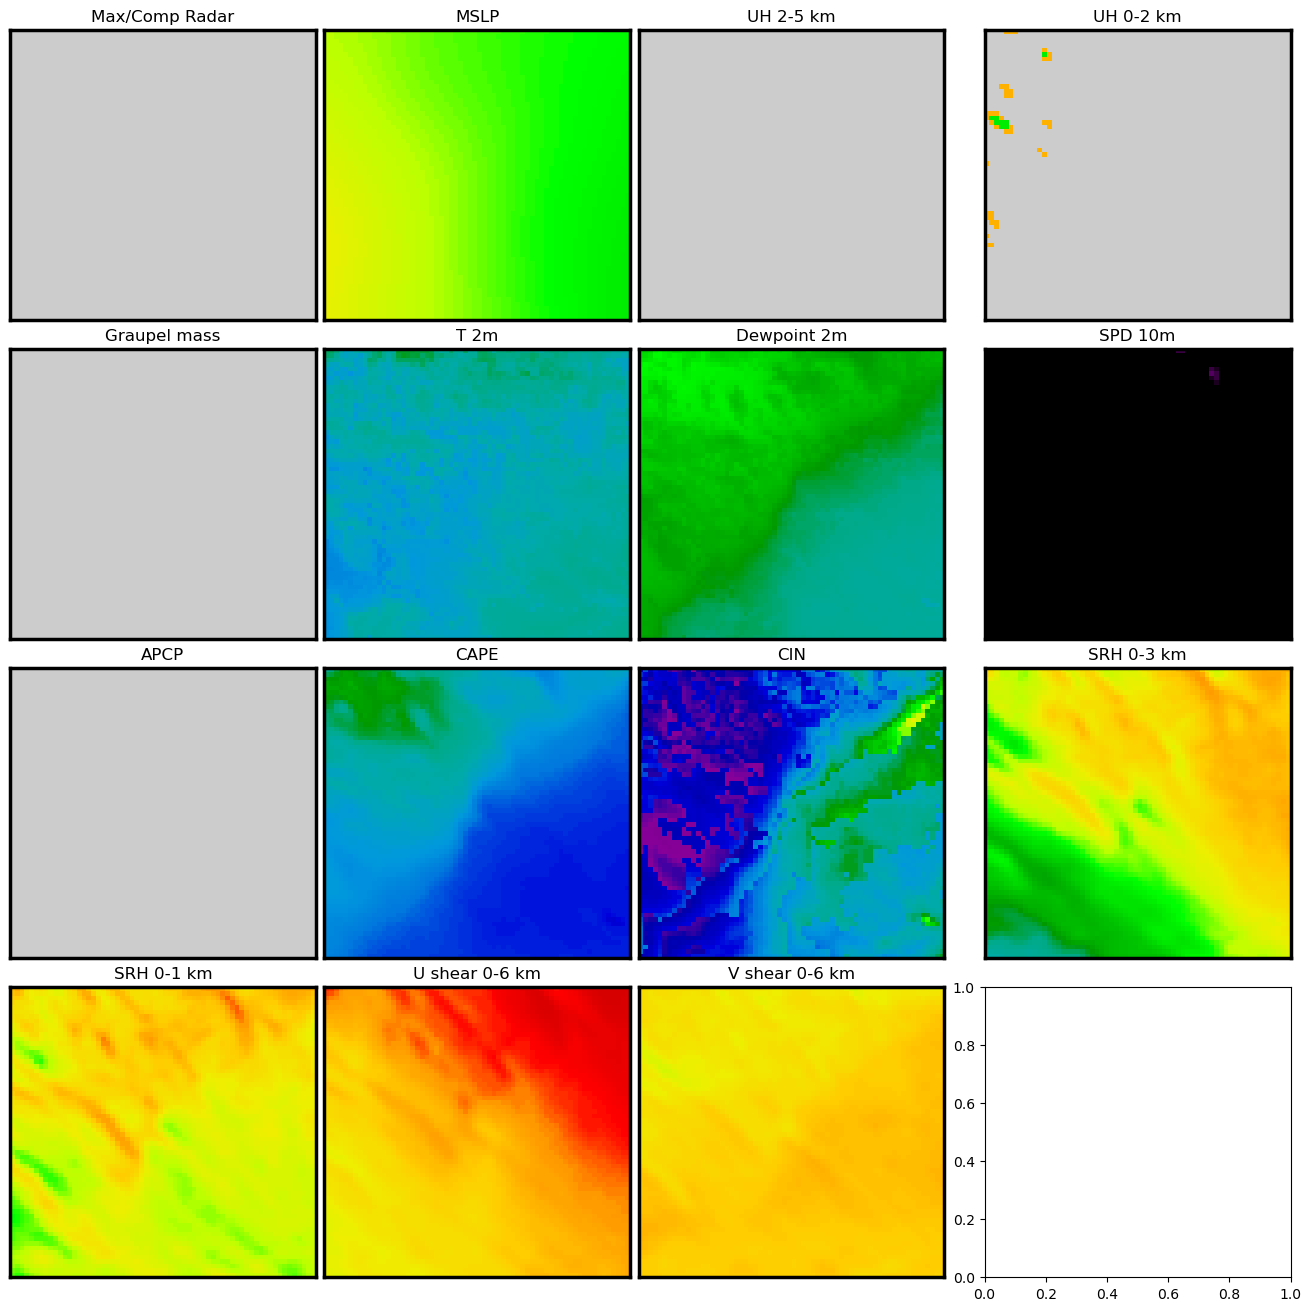

In [16]:

for i in range(1, 2, 1):

    data_v3 = np.load(filename_v3[i])

    #data = data[..., :1]

    fig, AX = plt.subplots(4, 4, figsize=(13, 13), constrained_layout=True)
    AX = AX.ravel()
    for i in range(15):
        ax = AX[i]
        ax = gu.ax_decorate_box(ax)
        try:
            if log_norm_pick[i]:
                ax.pcolormesh(data_v3[0, ..., i], vmin=0, vmax=1, cmap=plt.cm.nipy_spectral_r)
            else:
                ax.pcolormesh(data_v3[0, ..., i], vmin=-2, vmax=3, cmap=plt.cm.nipy_spectral_r)

            ax.set_title(name_pick[i])
        except:
            continue

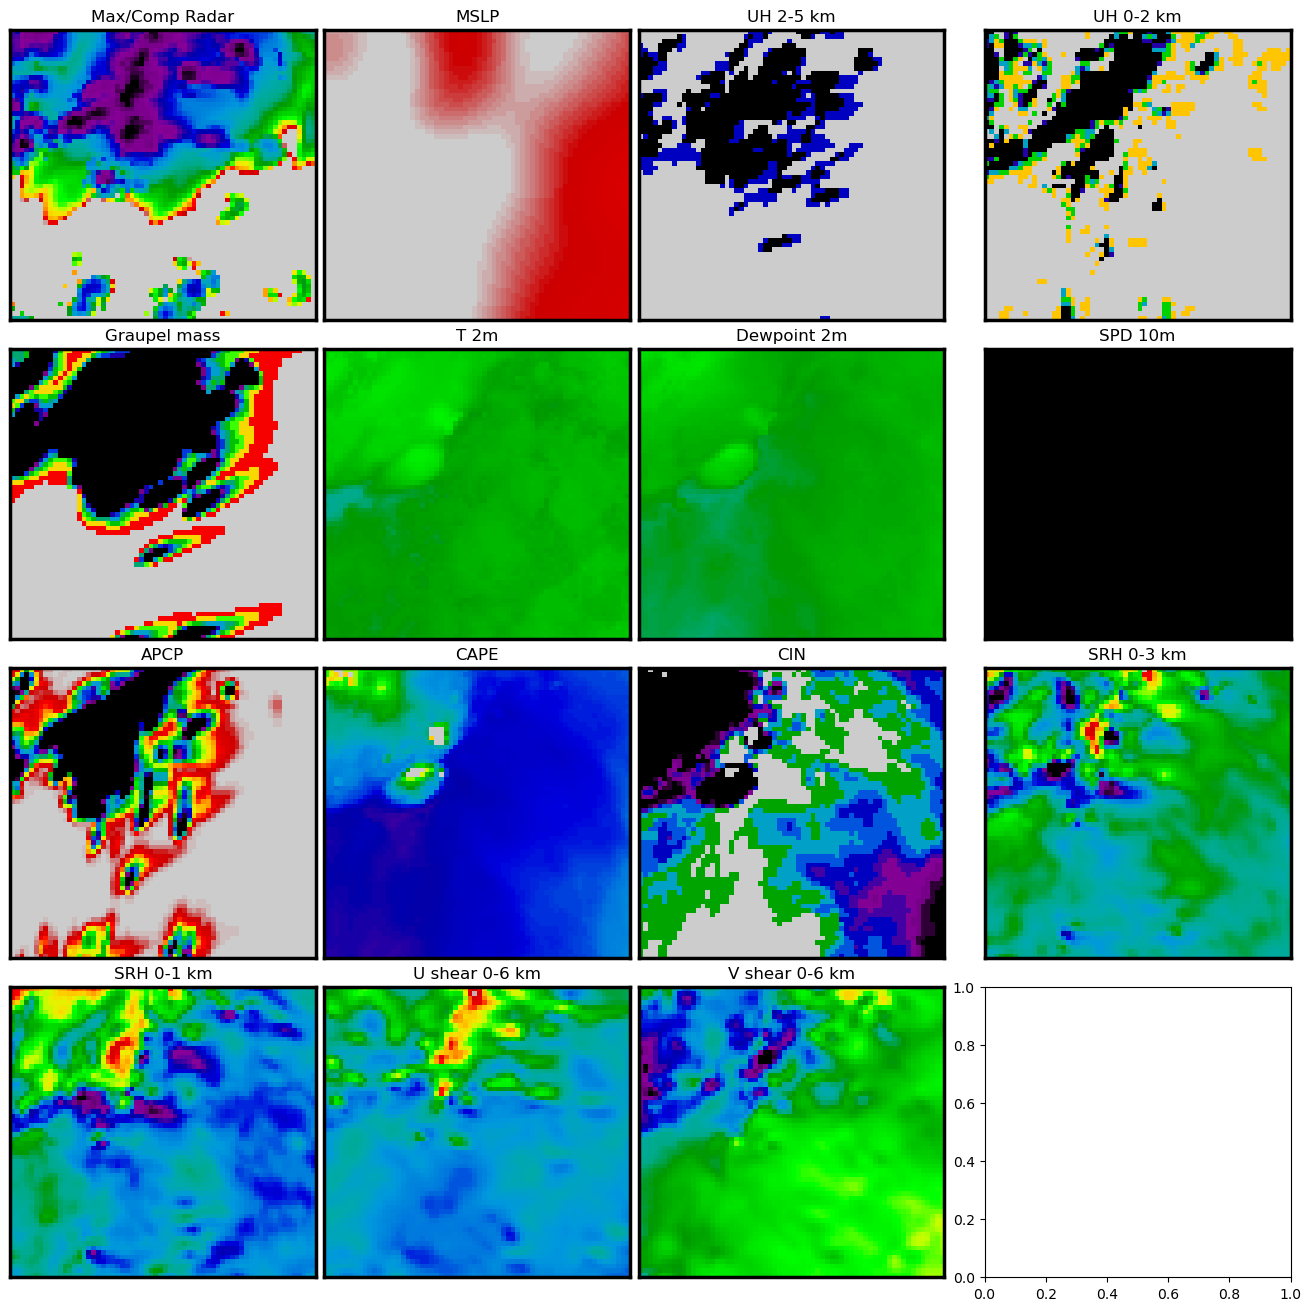

In [35]:

for i in range(1, 2, 1):

    data_v4 = np.load(filename_v4[i])

    #data = data[..., :1]

    fig, AX = plt.subplots(4, 4, figsize=(13, 13), constrained_layout=True)
    AX = AX.ravel()
    for i in range(15):
        ax = AX[i]
        ax = gu.ax_decorate_box(ax)
        try:
            if log_norm_pick[i]:
                ax.pcolormesh(data_v4[0, ..., i], vmin=0, vmax=1, cmap=plt.cm.nipy_spectral_r)
            else:
                ax.pcolormesh(data_v4[0, ..., i], vmin=-2, vmax=3, cmap=plt.cm.nipy_spectral_r)

            ax.set_title(name_pick[i])
        except:
            continue

(array([ 47., 278., 354., 369., 490., 825., 894., 573., 194.,  72.]),
 array([0.88511081, 0.9749781 , 1.0648454 , 1.15471269, 1.24457999,
        1.33444728, 1.42431458, 1.51418187, 1.60404917, 1.69391646,
        1.78378376]),
 <BarContainer object of 10 artists>)

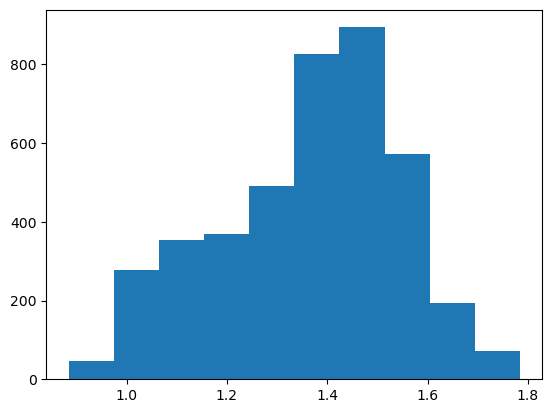

In [32]:
plt.hist(data_v3[..., 5].ravel())

(array([133., 312., 515., 546., 665., 821., 488., 340., 232.,  44.]),
 array([-1.57283929, -1.49636299, -1.41988669, -1.34341039, -1.26693409,
        -1.19045778, -1.11398148, -1.03750518, -0.96102888, -0.88455258,
        -0.80807628]),
 <BarContainer object of 10 artists>)

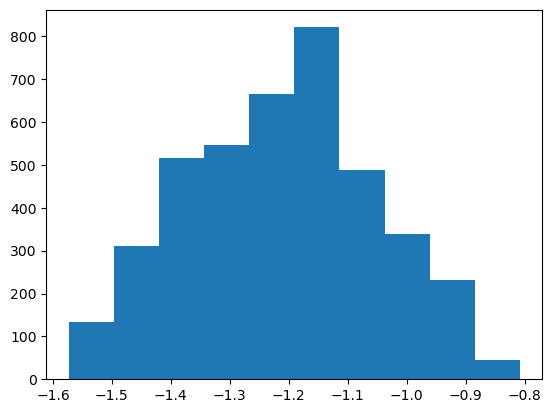

In [29]:
plt.hist(data_v4[..., 5].ravel())